In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Explain the dataset

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info() #four colums and 200 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isna().sum()  #No missing values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Text(0.5, 1.0, 'TV Distribution Plot')

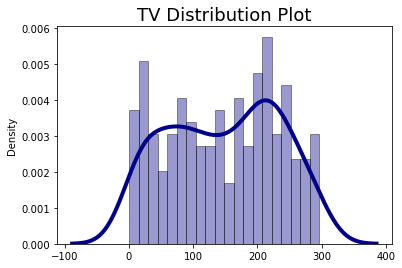

In [10]:
sns.distplot(df[['TV']], hist=True, kde=True,bins=int(20), color = 'darkblue',hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});
plt. title('TV Distribution Plot', fontsize=18)

Text(0.5, 1.0, 'Radio Distribution Plot')

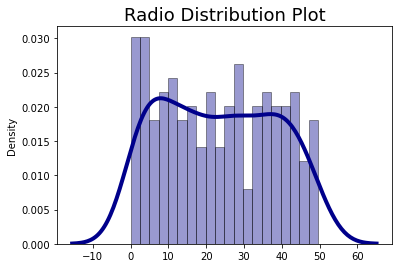

In [11]:
sns.distplot(df[['Radio']], hist=True, kde=True,bins=int(20), color = 'darkblue',hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});
plt. title('Radio Distribution Plot', fontsize=18)

Text(0.5, 1.0, 'Newspaper Distribution Plot')

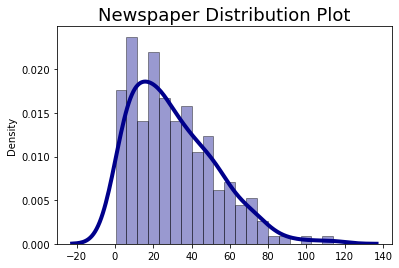

In [12]:
sns.distplot(df[['Newspaper']], hist=True, kde=True,bins=int(20), color = 'darkblue',hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});
plt. title('Newspaper Distribution Plot', fontsize=18)

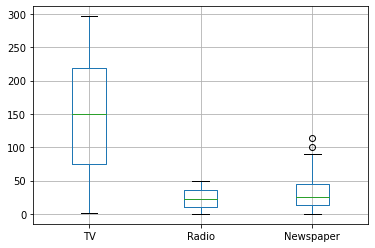

In [13]:
df.boxplot(column=['TV','Radio','Newspaper']);

The highest amount spend on TV adds than newspaper and Radio.

## 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
#Total 200 nos of values available for three categories
#Maximum amount spent on TV and Minimum in Radio.
#Average expanse/ for TV is 5 times to the Newspaper expanse.

## 3. The manager wants to find out whether the same amount was spent 
## for the three advertisements (TV , Radio and Newspaper). Comment 
## on your findings

In [16]:
#ANOVA Test

In [17]:
from scipy.stats import f_oneway

In [18]:
# H0:Same amount spent for advertisements 
# Ha:Different amount was spent
alpha=.05

In [19]:
_,pvalue=f_oneway(df['TV'],df['Radio'],df['Newspaper'])
pvalue

4.552931539744962e-103

In [20]:
if pvalue<alpha:
    print("Rejecting Null Hypothesis ")
else:
    print("Failing to Reject null Hypothesis")

Rejecting Null Hypothesis 


#### We can conclude that diffrent amount was spend on diffrent mediums for advertisement.